# Chapra 5.4

$$v = \sqrt{2gH} \tanh{\left( \sqrt{\frac{gH}{L}}t \right)}$$ 

where $g= 9.81 \,\, \mathrm{m/s^{2}}$, $H$ initial liquid level in the tank in m, $L$ pipe length in meter, and $t$ elapsed time.  

(a) plot function $v = f(H)$

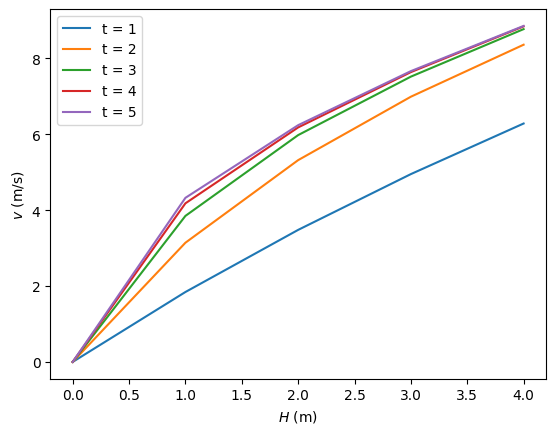

In [54]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.81
H = np.array([0, 1, 2, 3, 4])
L = 50


def cyl_tank(H,t):
    return np.sqrt(2 * g * H)*np.tanh(np.sqrt(g*H/L)*t)


plt.plot(H,cyl_tank(H,t = 1), label = 't = 1')
plt.plot(H,cyl_tank(H,t = 2), label = 't = 2')
plt.plot(H,cyl_tank(H,t = 3), label = 't = 3')
plt.plot(H,cyl_tank(H,t = 4), label = 't = 4')
plt.plot(H,cyl_tank(H,t = 5), label = 't = 5')
plt.xlabel(r'$H$ (m)')
plt.ylabel(r'$v$ (m/s)')
plt.legend()


# Chapra 5.8

$$
    f(x) = \sin(x) - x^{2}
$$

(a) Use an incremental search to bracket any roots in the interval $0.01 \le x \le 2$:

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return np.sin(x) - x**2

def IncSearch(func, xmin, xmax, ns = 50):
    x = np.linspace(xmin, xmax, ns)
    
    f = []
    for k in range(ns-1):
        f.append(func(x[k]))   
    nb = 0 

    xb = []
    for k in range(ns-2):
        if func(x[k])*func(x[k+1]) < 0:
            nb = nb+1
            xb.append((x[k], x[k+1]))

    if nb == 0:
        return 'No brackets found'
    else:
        return nb, xb

nb, xb = IncSearch(func, 0.01, 2)
print(xb)


[(0.8628571428571429, 0.9034693877551021)]


(b) plot the function over this domain of x to confirm your findings in (a)

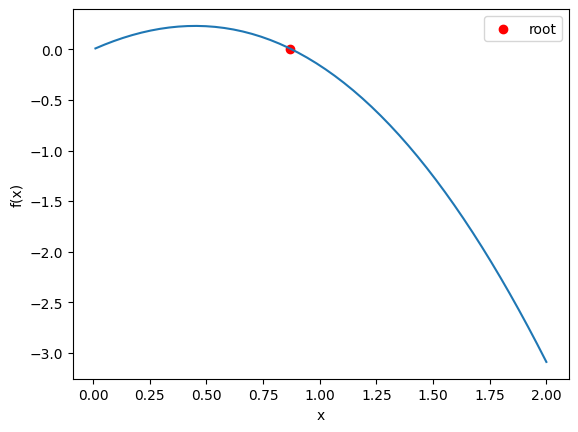

In [56]:
def Plotfunc(func, xmin, xmax, ns=50):
    x = np.linspace(xmin, xmax, ns)
    plot_func = plt.plot(x, func(x))
    plt.xlabel('x')
    plt.ylabel('f(x)')
    
    return plot_func

Plotfunc(func, 0.01, 2)

y_root = 0
x_root = 0.87
plt.scatter(x_root,y_root, color = 'red', label = 'root')
plt.legend()

(c) select appropriate initial guesses based on your observations in (a) and (b), and use bisection to solve the root. 

In [57]:
def Bisect(func, xl, xu, es=1e-7, maxit =30):
    if func(xl)*func(xu) > 0:
        return 'Initial estimates do not bracket the solution'
    
    xmold = xl
    for i in range(maxit):
        xm = (xl+xu)/2
        ea = abs((xm - xmold)/xm)
        if ea < es: break
        if func(xm)*func(xl) > 0:
            xl = xm
        else:
            xu = xm
        xmold = xm

    return xm, ea, i+1

xm, ea, iter = Bisect(func, 0.01, 2)
print('Root =  {:.3f} rad'.format(xm))
print('Relative error =  {:.5g}'.format(ea))
print('Number of iterations =  {}'.format(iter))

Root =  0.877 rad
Relative error =  6.7646e-08
Number of iterations =  25


# Chapra 5.11

The volume of the liquid in the tank is given by
$$
    V = \frac{\pi h^{2}(3R-h)}{3}
$$


(a) For a tank with $R = 5 \, \mathrm{m}$, use bisection to solve for $h$ for a liquid volume of $300 \, \mathrm{m^{2}}$, Note: The equation above is a cubic polynomial in $h$ and has three real roots; however, one root is above the tank and another is below the tank. So, using empty and full tank as initial guesses will guarantee isolation of the meaningful root. Also, note that $h = 2R$ at the top of the tank.

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def TankVolume(h):
    r = 5
    V = 300
    return np.pi*h**2*r - (np.pi*h**3)/3 - V

r = 5
nb, xb = IncSearch(TankVolume, 0, 2*r)
print(xb)

roots, ea, iter = Bisect(TankVolume, 0, 2*r)
print('h = {:.5g} m'.format(roots))
print('Number of iterations = {}'.format(iter))

[(5.3061224489795915, 5.510204081632653)]
h = 5.4879 m
Number of iterations = 25


(b) Again, using bisection , compute and display a calibration table of $h$ versus V for $10 \, \mathrm{m^{3}}$ intervals from empty to (just berfore) full tank. Note: The volume of the full tank is the volume of a sphere of radius $R$.

# Chapra 5.18

The resisvity, $\rho$, of doped silicon is based on charge, $q$, on an electron, the electron density, $n$, and the electron mobility, $\mu$. The electron density in terms of the doping density, $N$, and the intrinsic carrier density, $n_{i}$. The electron mobility is described by the temperature, $T$, the reference temperature, $T_{0}$, and the reference mobility, $\mu_{0}$. The equations required to compute the resistivity are

$$
    \rho = \frac{1}{qn\mu},
$$

where

$$
    n = \frac{1}{2} \left( N + \sqrt{N^{2}+4n_{i}^{2}}\right),
$$

and 

$$
    \mu = \mu_{0} \left( \frac{T}{T_{0}} \right)^{-2.42}
$$

Determine $N$, given

$T_{0} = 300$ K, $T = 1000$ K, $\mu_{0} = 1360 \,\, \mathrm{cm^{2}/V/s}$, $q = 1.7 \times 10^{-19}$ C, $n_{i} = 6.21 \times 10^{9} \mathrm{cm}^{-3}$, and a desired $\rho = 6.5 \times 10^{6} \,\, \mathrm{V.s.cm/C}$. Employ initial guesses of $0$ and $2.5 \times 10^{10}$ for $N$. Solve for $N$ using the bisection method with 20 iterations.

In [63]:
import numpy as np

def resist(N):

    T_0 = 300
    T = 1000
    mu_0 = 1360
    q = 1.7e-19
    n_i = 6.21e+9
    n = 1/2*(N+np.sqrt(N**2+4*n_i**2))
    rho = 6.5e+6
    mu = mu_0*(T/T_0)**(-2.42)
    
    return 1/(q*n*mu) - rho


def Bisect(func, xl, xu, es=1e-7, maxit =30):
    if func(xl)*func(xu) > 0:
        return 'Initial estimates do not bracket the solution'
    
    xmold = xl
    for i in range(maxit):
        xm = (xl+xu)/2
        ea = abs((xm - xmold)/xm)
        if ea < es: break
        if func(xm)*func(xl) > 0:
            xl = xm
        else:
            xu = xm
        xmold = xm

    return xm, ea, i+1

N1 = 0
N2 = 2.5e+10
roots, ea, iter = Bisect(resist, N1, N2)
print('N = {:.5g} cm^-3'.format(roots))
print('Number of iterations = {}'.format(iter))

N = 9.1136e+09 cm^-3
Number of iterations = 25


# Chapra 5.19

A total charge, $Q$, is uniformly distributed around a ring-shaped conductor with radius $a$. A separate charge, $q$, is located at a distance, $x$, from the center of the ring. The force exerted on the charge by the ring is given by

$$
    F = \frac{1}{4 \pi \varepsilon_{0}} \frac{q Q x}{(x^{2}+a^{2})^{3/2}}
$$

where $\varepsilon_{0} = 8.9 \times 10^{-12} \,\, \mathrm{C^{2}/(N \bullet m^{2})}$. Find the distance, $x$, where the force is $1.25 $ N, if q and Q are equal to $2 \times 10^{-5} \,\, \mathrm{C}$ for a ring with radius $0.85 \,\, \mathrm{m}$

In [60]:
def ForceEq(x):
    e0 = 8.9e-12
    F = 1.25
    q = 2e-5
    Q = 2e-5
    a = 0.85

    return (1/(4*np.pi*e0))*q*Q*x/((x**2+a**2)**(3/2)) - F

nb, xb = IncSearch(ForceEq, 0, 3)
print(xb)
x_lower, x_upper = np.array(xb[0])

#Root 1
x_lower, x_upper = np.array(xb[0])
x1, ea1, iter1 = Bisect(ForceEq, x_lower, x_upper)
print('Root 1 =  {:.3f} m'.format(x1))
print('Relative error =  {:.5g}'.format(ea1))
print('Number of iterations =  {}'.format(iter1))

print('------------------------------------------------------------------------')

#Root 2
x_lower, x_upper = np.array(xb[1])
x2, ea2, iter2 = Bisect(ForceEq, x_lower, x_upper)
print('Root 2 =  {:.3f} m'.format(x2))
print('Relative error =  {:.5g}'.format(ea2))
print('Number of iterations =  {}'.format(iter2))

[(0.18367346938775508, 0.24489795918367346), (1.2857142857142856, 1.346938775510204)]
Root 1 =  0.241 m
Relative error =  2.4223e-07
Number of iterations =  20
------------------------------------------------------------------------
Root 2 =  1.291 m
Relative error =  9.0435e-08
Number of iterations =  19
